In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x=t_x/255.0
s_tt_x=tt_x/255.0
s_t_x = s_t_x.reshape(-1,28*28)
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y = train_test_split(s_t_x,t_y,test_size=0.2,random_state=42)
t_x.shape

(48000, 784)

In [2]:
#내부  층에서 소프트맥스 사용 불가능 마지막단에서만 가능 즉 시그노이드나 relu사용
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))#1층 #100개의 뉴론 , 입력단 784개
dense2 = keras.layers.Dense(10,activation='softmax')#2층  #10개선을 만든다.
#위의 것들로 학습을 위한 모델을 만들어줘야한다.
model = keras.Sequential([dense1,dense2])#쌓을층에 대한것을 구조로 전달/모델을 만드는 객체

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


_____(100)________(10)_______(10)<br><br>
784 -> h=784x100 -> 100x10

In [4]:
model = keras.Sequential([keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name='hidden'), keras.layers.Dense(10,activation='softmax',name='output')],name='ck')
model.summary()

Model: "ck"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = keras.Sequential(name='ck')
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name='hidden'))
model.add(keras.layers.Dense(10,activation='softmax',name='output'))
model.summary()


Model: "ck"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


학습 방법지정

In [6]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(t_x,t_y,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5707 - accuracy: 0.8055
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4086 - accuracy: 0.8514
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3732 - accuracy: 0.8654
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3508 - accuracy: 0.8723
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3336 - accuracy: 0.8796
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3197 - accuracy: 0.8835
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3076 - accuracy: 0.8881
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2969 - accuracy: 0.8926
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2890 - accuracy: 0.8944
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.281

In [7]:
model = keras.Sequential(name='ck')
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu',name='hidden'))
model.add(keras.layers.Dense(10,activation='softmax',name='output'))#이진분류에서 시그모이드는 확률 / 소프트맥스는 범주화해서 분류
model.summary()


Model: "ck"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
#reshape. 하기전값
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x=t_x/255.0
t_x,v_x,t_y,v_y = train_test_split(s_t_x,t_y,test_size=0.2,random_state=42)
t_x.shape

(48000, 28, 28)

In [9]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(t_x,t_y,epochs=15)

Epoch 1/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5372 - accuracy: 0.8098
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3939 - accuracy: 0.8594
Epoch 3/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3550 - accuracy: 0.8720
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3316 - accuracy: 0.8817
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3177 - accuracy: 0.8872
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3070 - accuracy: 0.8905
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8943
Epoch 8/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2876 - accuracy: 0.8978
Epoch 9/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9001
Epoch 10/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.275

In [10]:
model.evaluate(v_x,v_y)

375/375 [==============================] - 1s 1ms/step - loss: 0.4418 - accuracy: 0.8749


[0.4417593479156494, 0.874916672706604]

In [11]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')#accuracy':정확도
#crossentropy:오차/optimizer='sgd': 기울기값 0 
#그라디언트 기울기는 학습률 러닝메이트로 조절가능
#모멘텀은 가속도에 의해 넘어가는 방식

In [12]:
sgd=keras.optimizers.SGD(learning_rate=0.1)#내가원하는방식으로 가중치 조절해서 옵티마이져 조절
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [13]:
sgd=keras.optimizers(momentum=0.9,nesterov=True)

TypeError: 'module' object is not callable

In [14]:
keras.optimizers.RMSprop

keras.optimizer_v2.rmsprop.RMSprop

In [15]:
keras.optimizers.Adagrad

keras.optimizer_v2.adagrad.Adagrad

In [16]:
model1 = keras.Sequential(name='ck')
model1.add(keras.layers.Flatten(input_shape=(28,28)))
model1.add(keras.layers.Dense(100,activation='relu',name='hidden'))
model1.add(keras.layers.Dense(10,activation='softmax',name='output'))#이진분류에서 시그모이드는 확률 / 소프트맥스는 범주화해서 분류
model1.summary()
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model1.fit(t_x,t_y,epochs=5)

Model: "ck"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5238 - accuracy: 0.8170
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3910 - accuracy: 0.8615
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3521 - accuracy: 0.8721
Epoch 4/5
1500/1500 [

In [17]:
model.evaluate(v_x,v_y),model1.evaluate(v_x,v_y)

375/375 [==============================] - 1s 1ms/step - loss: 0.3545 - accuracy: 0.8708


([0.4417593479156494, 0.874916672706604],
 [0.3545064628124237, 0.8707500100135803])

data 확인

In [18]:
t_x.shape

(48000, 28, 28)

모델생성

In [19]:
m1=keras.Sequential()#모델생성객체
m1.add(keras.layers.Flatten(input_shape=(28,28)))#입력단 레이어층
m1.add(keras.layers.Dense(100,activation='relu'))#dense 데이터 모양(뉴련의 갯수)
m1.add(keras.layers.Dense(300,activation='relu'))
m1.add(keras.layers.Dense(10,activation='softmax'))
m1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 300)               30300     
                                                                 
 dense_4 (Dense)             (None, 10)                3010      
                                                                 
Total params: 111,810
Trainable params: 111,810
Non-trainable params: 0
_________________________________________________________________


In [20]:
m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=m1.fit(t_x,t_y,epochs=30,validation_data=(v_x,v_y))

Epoch 1/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5090 - accuracy: 0.8155 - val_loss: 0.3913 - val_accuracy: 0.8553
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3739 - accuracy: 0.8626 - val_loss: 0.3995 - val_accuracy: 0.8593
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3337 - accuracy: 0.8752 - val_loss: 0.3449 - val_accuracy: 0.8748
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3113 - accuracy: 0.8841 - val_loss: 0.3353 - val_accuracy: 0.8798
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2920 - accuracy: 0.8895 - val_loss: 0.3255 - val_accuracy: 0.8813
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2780 - accuracy: 0.8946 - val_loss: 0.3372 - val_accuracy: 0.8799
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2649 - accuracy: 0.8995 - val_loss: 0.3377 - val_accuracy:

In [21]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1500}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 1.0)

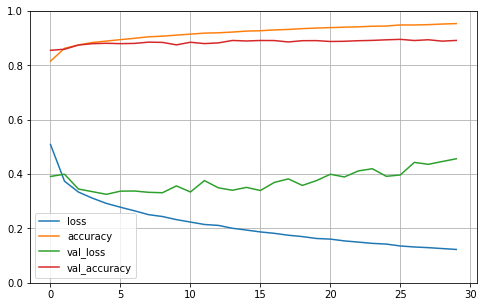

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)#격자무늬
plt.gca().set_ylim(0,1)

In [24]:
m2=keras.Sequential()#모델생성객체
m2.add(keras.layers.Flatten(input_shape=(28,28)))#입력단 레이어층
m2.add(keras.layers.Dense(300,activation='relu'))#dense 데이터 모양(뉴련의 갯수)
m2.add(keras.layers.Dense(100,activation='relu'))
m2.add(keras.layers.Dense(10,activation='softmax'))
m2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
m2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history1=m2.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4957 - accuracy: 0.8188 - val_loss: 0.3890 - val_accuracy: 0.8568
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3681 - accuracy: 0.8651 - val_loss: 0.3703 - val_accuracy: 0.8667
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3299 - accuracy: 0.8782 - val_loss: 0.3455 - val_accuracy: 0.8752
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3086 - accuracy: 0.8857 - val_loss: 0.3395 - val_accuracy: 0.8712
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2873 - accuracy: 0.8927 - val_loss: 0.3411 - val_accuracy: 0.8774
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2726 - accuracy: 0.8994 - val_loss: 0.3226 - val_accuracy: 0.8870
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2595 - accuracy: 0.9020 - val_loss: 0.3179 - val_accuracy:

(0.0, 1.0)

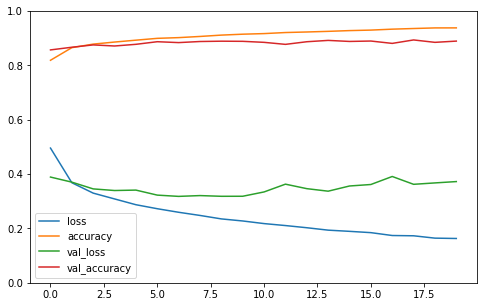

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)

In [28]:
m3=keras.Sequential()#모델생성객체
m3.add(keras.layers.Flatten(input_shape=(28,28)))#입력단 레이어층
m3.add(keras.layers.Dense(300,activation='relu'))#dense 데이터 모양(뉴련의 갯수)
m3.add(keras.layers.Dense(100,activation='relu'))
m3.add(keras.layers.Dense(10,activation='softmax'))
m3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
m3.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')
history2=m3.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7390 - accuracy: 0.7600 - val_loss: 0.5430 - val_accuracy: 0.8101
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4990 - accuracy: 0.8275 - val_loss: 0.4876 - val_accuracy: 0.8253
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4564 - accuracy: 0.8411 - val_loss: 0.4919 - val_accuracy: 0.8255
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4281 - accuracy: 0.8494 - val_loss: 0.4402 - val_accuracy: 0.8437
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4085 - accuracy: 0.8563 - val_loss: 0.4085 - val_accuracy: 0.8580
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3916 - accuracy: 0.8618 - val_loss: 0.3882 - val_accuracy: 0.8649
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3780 - accuracy: 0.8675 - val_loss: 0.3924 - val_accuracy:

(0.0, 1.0)

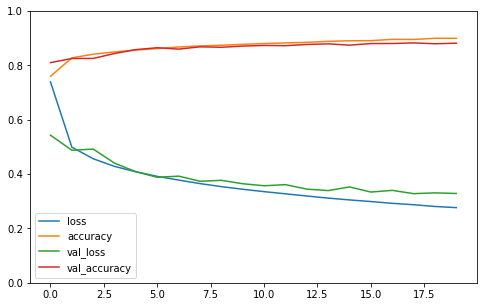

In [30]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)

In [37]:
m3.evaluate(s_tt_x,tt_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8728


[0.35051989555358887, 0.8727999925613403]

In [38]:
m1.evaluate(s_tt_x,tt_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.6807 - accuracy: 0.8846


[0.6807288527488708, 0.8845999836921692]

In [39]:
m2.evaluate(s_tt_x,tt_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8884


[0.39670825004577637, 0.8884000182151794]